シクロヘキサンの反転を量子化学計算し、安定なコンフォーマーと遷移状態を求める。
つまり、イス型 (chair) 、半イス型 (half-chair) 、ボート型 (boat) 、ひずみボート型 (twist-boat) を得ることになる。Linuxのみ対応。他amd64のOSでは、Dockerでの環境構築を推奨。中田はDocker on Windowsで構築した。

参考文献
<ul>
<li> <a href="https://en.wikipedia.org/wiki/Cyclohexane_conformation">wikipedia cyclohexane conformation</a>
<li> <a href="https://pubs.acs.org/doi/pdf/10.1021/ed074p813">A Three-Dimensional Energy Surface for the Conformational Inversion of Cyclohexane J. Chem. Educ. 1997, 74, 7, 813</a>
<li>  <a href="https://pubs.acs.org/doi/10.1021/j100377a041">Ab initio conformational analysis of cyclohexane J. Phys. Chem. 1990, 94, 14, 5630–5636</a>
<li> P. Pracht, F. Bohle, S. Grimme, PCCP, 2020, 22, 7169-7192.
<li> S. Grimme, JCTC, 2019, 15, 2847-2862.
</ul>

Prerequiesties:
<ul>
    <li> <a href="https://github.com/ZimmermanGroup/molecularGSM">molecular GMS </a>
    <li> <a href="https://github.com/grimme-lab/xtb">xtb : tight binding DFT</a> 
    <li> <a href="https://github.com/grimme-lab/crest">crest: conformer sampling tool</a> crestはバイナリ配布のため、Linuxのみ対応である。
    <li> <a href="https://github.com/charnley/rmsd">calculate RMSD</a>
<ul>
                  

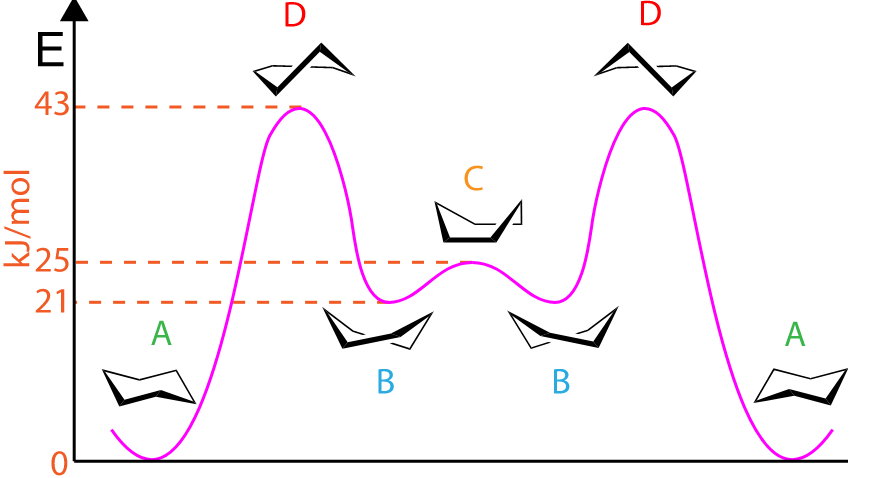

Open Babelでcyclohexaneの三次元構造を生成

In [1]:
!obabel -:"C1CCCCC1" --gen3d -h -o xyz -Ocyclohexane.xyz

1 molecule converted


ここではイス型が得られた。

In [2]:
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
view = JsmolView.from_file("cyclohexane.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

xtbで構造最適化する (https://github.com/grimme-lab/xtb)

In [3]:
!xtb cyclohexane.xyz --opt

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.3.2 (unknown-commit) compiled by '@Linux' on 09/23/2020

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; withou


          ...................................................
          :                      SETUP                      :
          :.................................................:
          :   optimization level            normal          :
          :   max. optcycles                   200          :
          :   ANC micro-cycles                  20          :
          :   degrees of freedom                48          :
          :.................................................:
          :   RF solver                   davidson          :
          :   write xtbopt.log                true          :
          :   linear?                        false          :
          :   energy convergence         0.5000000E-05 Eh   :
          :   grad. convergence          0.1000000E-02 Eh/α :
          :   maximium RF displ.         1.0000000          :
          :   Hlow (freq-cutoff)         0.1000000E-01      :
          :   Hmax (freq-cutoff)         5.0000000          :
       

   2    -19.2676489 -0.182965E-11  0.757E-06   13.66    3115.2  T
   3    -19.2676489 -0.106581E-12  0.412E-06   13.66    5724.3  T

   *** convergence criteria satisfied after 3 iterations ***

         #    Occupation            Energy/Eh            Energy/eV
      -------------------------------------------------------------
         1        2.0000           -0.6290436             -17.1171
       ...           ...                  ...                  ...
        12        2.0000           -0.4614201             -12.5559
        13        2.0000           -0.4614130             -12.5557
        14        2.0000           -0.4340125             -11.8101
        15        2.0000           -0.4340108             -11.8100
        16        2.0000           -0.4167635             -11.3407
        17        2.0000           -0.4091714             -11.1341
        18        2.0000           -0.4091615             -11.1339 (HOMO)
        19                          0.0927810               

In [4]:
!mv xtbopt.xyz cyclohexane.xtbopt.xyz

In [5]:
view = JsmolView.from_file("cyclohexane.xtbopt.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

ここでもイス型が得られた。初期構造がイス型なので当然だと思われる。

crestでコンフォーマーを求める

In [6]:
!crest cyclohexane.xtbopt.xyz 

 
       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |       based on the GFNn-xTB methods        |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.10.2, Tue 9. Jun 13:32:10 CEST 2020
       Using the xTB program.
       Compatible with XTB version 6.1 and later.
 
   Cite work conducted with this code as

   P. Pracht, F. Bohle, S. Grimme, PCCP, 2020, 22, 7169-7192.

   and

   S. Grimme, JCTC, 2019, 15, 2847-2862.
 
   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

 Command line input:
 > crest cyclohexane.xtbopt.xyz

  # threads =           1
-------------------------
Starting z-matrix sorting
-------

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277

crestが正常終了すると、コンフォーマーがxyzフォーマットで二つ出てくるため、それを分割しておく。

In [7]:
!python3 splitxyz.py crest_conformers.xyz cyclohexane.crest

output: cyclohexane.crest.0000.xyz 
output: cyclohexane.crest.0001.xyz 


crestでコンフォーマー求めたらイス型と歪みボート型が得られた。これらは(局所)最適構造となっている。

In [8]:
view = JsmolView.from_file("cyclohexane.crest.0000.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [9]:
view = JsmolView.from_file("cyclohexane.crest.0001.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [10]:
!cp cyclohexane.crest.0001.xyz cyclohexane.twistboat.xtb.xyz
!cp cyclohexane.crest.0000.xyz cyclohexane.chair.xtb.xyz

イス型と歪みボート型は局所安定構造で、それらをつなぐ遷移状態の半イス型が存在する。これを求めてみよう。
これには、https://xtb-docs.readthedocs.io/en/latest/gsm.html を用いる。gsm_xtb.tgzはGrimme先生からもらう必要がある。が、このgithubのディレクトリにある。

In [11]:
!tar xvfz gsm_xtb.tgz

./
./tm2orca.py
./start.xyz
./.fitpar2
./inpfileq
./scratch/
./scratch/initial0000.xyz
./gsm.orca
./end.xyz
./ograd


In [12]:
!sed -i -e "2d" cyclohexane.chair.xtb.xyz
!sed -i -e "2d" cyclohexane.twistboat.xtb.xyz
!sed -i -e "2i\ " cyclohexane.chair.xtb.xyz
!sed -i -e "2i\ " cyclohexane.twistboat.xtb.xyz
!cat cyclohexane.chair.xtb.xyz cyclohexane.twistboat.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

  18
 
 C         -1.4396805893       -0.1481409844       -0.2416306395
 C         -0.5915527899       -1.3209411471        0.2415783222
 C          0.8481684975       -1.1727030353       -0.2415549995
 C          1.4397811671        0.1482185623        0.2415934371
 C          0.5914753979        1.3208481547       -0.2416590646
 C         -0.8482040596        1.1727265430        0.2416731671
 H         -1.4515644374        2.0069706396       -0.1232226441
 H         -0.8670434243        1.1989543497        1.3339091670
 H          1.0122872673        2.2604578292        0.1232842329
 H          0.6046998266        1.3504065804       -1.3338840447
 H          2.4638368030        0.2536251676       -0.1235437742
 H          1.4721063635        0.1516379287        1.3338030170
 H          1.4514538751       -2.0068470221        0.1236457117
 H          0.8672667924       -1.1991286017       -1.3337589195
 H         -1.0123068494       -2.2605107415       -0.1236031553
 H         -0.6048

In [13]:
!./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 



 growing iter: 4 
 adding node: 4 between 3 21 
 iR,iP: 3 21 iN: 4  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.036 0.036 0.037 0.051
 adding node: 20 between 21 4 
 iR,iP: 21 4 iN: 20  dqmag: 1.00 dq0[constraint]: -0.06 
 initial Hint ev: 0.035 0.036 0.038 0.051
 rpart:  0.12 0.12 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.12 0.12 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.62 0.62 0.61 2.54 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.54 0.61 0.62 0.62 0.64  disprms: 0.033 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following fl

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



 growing iter: 8 
 adding node: 8 between 7 17 
 iR,iP: 7 17 iN: 8  dqmag: 1.00 dq0[constraint]: -0.11 
 initial Hint ev: 0.035 0.036 0.037 0.050
 adding node: 16 between 17 8 
 iR,iP: 17 8 iN: 16  dqmag: 1.00 dq0[constraint]: -0.12 
 initial Hint ev: 0.035 0.035 0.037 0.051
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.62 0.62 0.62 0.62 0.62 0.62 0.62 1.83 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.83 0.62 0.62 0.62 0.62 0.63 0.62 0.63 0.64  disprms: 0.027 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following fl

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.002 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.24 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.003 ss: 0.005 (DMAX: 0.100) predE: -0.00  E(M): 0.86 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.004 ss: 0.008 (DMAX: 0.100) predE: -0.01  E(M): 1.78 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 2.91 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.005 ss: 0.013 (DMAX: 0.100) predE: -0.02  E(M): 4.19 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.006 ss: 0.


 growing iter: 11 
 adding node: 11 between 10 14 
 iR,iP: 10 14 iN: 11  dqmag: 1.00 dq0[constraint]: -0.33 
 initial Hint ev: 0.035 0.035 0.037 0.050
 adding node: 13 between 14 11 
 iR,iP: 14 11 iN: 13  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.035 0.037 0.050
 rpart:  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.00
 spacings (end ic_reparam, steps: 4):  0.64 0.63 0.63 0.63 0.63 0.62 0.62 0.62 0.62 0.62 0.62 0.94 0.00 0.94 0.69 0.62 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.64  disprms: 0.070 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The follo


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal ter

 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: -0.00 disp[13]: 0.00 disp[14]: -0.00 disp[15]: -0.00 disp[16]: -0.00 disp[17]: -0.00 disp[18]: -0.00 disp[19]: -0.00 disp[20]: -0.00 disp[21]: -0.00 disp[22]: -0.00 disp[23]: 0.00
 spacings (end ic_reparam, steps: 5):  0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.64 0.63 0.64 0.64 0.64 0.64 0.64 0.63 0.64 0.64 0.63 0.63 0.64  disprms: 0.010 
 V_profile:  0.0 0.2 0.9 1.8 3.0 4.3 5.6 7.0 8.2 9.4 10.3 11.0 11.5 11.6 11.5 11.1 10.5 9.7 8.9 8.1 7.3 6.6 6.0 5.5 5.4
 3 way tangent (13): f1: 0.53 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floati

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 mag/DTHRESH: 0.001276 0.000050 lamb/lambp: -0.002 -0.002 
 vector 0 converged 
 mag/DTHRESH: 0.000790 0.000050 lamb/lambp: -0.000 -0.000 
 vector 1 converged 
 mag/DTHRESH: 0.005147 0.000050 lamb/lambp: 0.004 0.004 
 vector 2 converged 

 Davidson iteration 3 

 mag/DTHRESH: 0.001276 0.000050 lamb/lambp: -0.002 -0.002 
 vector 0 converged 
 mag/DTHRESH: 0.000790 0.000050 lamb/lambp: -0.000 -0.000 
 vector 1 converged 
 mag/DTHRESH: 0.005147 0.000050 lamb/lambp: 0.004 0.004 
 vector 2 converged 
 Davidson converged 

 now saving vibrations to stringfile.xyz0000fr 
 Hessian eigenvalues: -0.002 -0.000 0.004

 Updating Hint with new vectors 
 updating vector: 1 with curvature: -0.00233 
 updating vector: 2 with curvature: -0.00023 
 updating vector: 3 with curvature: 0.00401 

 Davidson required 12 gradients 

 found 2 negative eigenvalues 
 creating final string f

これで半イス型が得られた。半イスという割には座る部分は若干歪んでいるように見える。

In [14]:
!cp scratch/tsq0000.xyz cyclohexane.halfchair.xtb.xyz

In [15]:
view = JsmolView.from_file("cyclohexane.halfchair.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

アニメーションでみてみると、うまくいっていることがわかる。

In [16]:
!cp stringfile.xyz0000 cyclohexane.chair2twistboat.xtb.xyz

In [25]:
view = JsmolView()
display(view)
view.load('cyclohexane.chair2twistboat.xtb.xyz', inline=False)
view.script('anim mode palindrome ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

ボート型を求める。歪みボート型と歪みボート型の遷移にはボート型を経由する。
下図の歪みボート型と歪みボート型は鏡像関係にある。まず、どちらかをL, Rなどとしておき、Lのxyzファイルのy軸を変更する。
ただし、それだけでは原子の順番も変更されてしまうので、手で入れなおした。

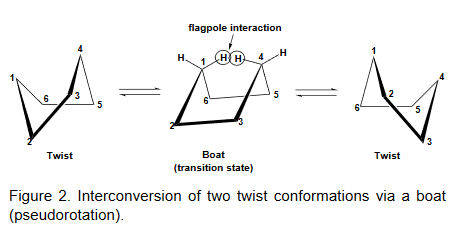

In [18]:
!cp cyclohexane.twistboat.xtb.xyz cyclohexane.twistboatR.xtb.xyz
!python3 inverse_y.py cyclohexane.twistboatR.xtb.xyz > cyclohexane.twistboatL.xtb.xyz
!calculate_rmsd -e -p cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > l ; mv l cyclohexane.twistboatL.xtb.xyz
!cp cyclohexane.twistboatL_ok.xtb.xyz cyclohexane.twistboatL.xtb.xyz

残念ながらすべてをスクリプトでは処理できなかったのでpymolを見ながら手で原子を入れ替えていった。

In [19]:
!rm -f ./scartch/initial0000.xyz
!cat cyclohexane.twistboatR.xtb.xyz cyclohexane.twistboatL.xtb.xyz > ./scratch/initial0000.xyz
!cat ./scratch/initial0000.xyz
!cat inpfileq

  18
 
 C         -1.5157007107       -0.0000305098       -0.0002787400
 C         -0.6516407028       -1.2042398246       -0.3951228484
 C          0.6518238461       -1.2039428064        0.3953988134
 C          1.5157433393        0.0000892288       -0.0002333358
 C          0.6516002624        1.2041584634       -0.3952071873
 C         -0.6518126887        1.2039688056        0.3954430309
 H         -1.2027288941        2.1291868822        0.2166666598
 H         -0.4169499699        1.1640978274        1.4608062012
 H          1.2023588565        2.1293567368       -0.2160382269
 H          0.4166957342        1.1646702516       -1.4605644077
 H          2.1622756921       -0.2673665175       -0.8384296148
 H          2.1627823865        0.2676102230        0.8375788650
 H          0.4169507044       -1.1641624675        1.4607570830
 H          1.2027262320       -2.1291477430        0.2165737344
 H         -0.4167747615       -1.1650987335       -1.4604829981
 H         -1.2024

In [20]:
!./gsm.orca

 Number of QC processors: 1 
***** Starting Initialization *****
 runend 1
  -structure filename from input: scratch/initial0000.xyz 
Initializing Tolerances and Parameters... 
  -Opening inpfileq 
  -reading file... 
  -using GSM 
  -RESTART: 0
  -MAX_OPT_ITERS: 200
  -STEP_OPT_ITERS: 30
  -CONV_TOL = 0.0005
  -ADD_NODE_TOL = 0.1
  -SCALING = 1
  -SSM_DQMAX: 0.8
  -SSM_DQMIN: 0.2
  -GROWTH_DIRECTION = 0
  -INT_THRESH: 2
  -SSM_MIN_SPACING: 5
  -BOND_FRAGMENTS = 1
  -INITIAL_OPT: 0
  -FINAL_OPT: 150
  -PRODUCT_LIMIT: 100
  -TS_FINAL_TYPE: 0
  -NNODES = 25
 Done reading inpfileq 

 reading isomers 
 couldn't find ISOMERS file: scratch/ISOMERS0000 
Reading and initializing string coordinates 
  -Opening structure file 
  -reading file... 
  -The number of atoms is: 18
  -Reading the atomic names...  -Reading coordinates...Opening xyz file 
Finished reading information from structure file

****************************************
****************************************
****** Starting IC


 ic1.nbonds: 18 ic2.nbonds: 18 
 saving bond union: 18  saving angle union: 36  saving torsion union: 54  total number of coordinates: 108 



 ---- Now preparing gradients ---- 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
  grad initiated: ORCA mode 
 ---- Done preparing gradients ---- 


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

 
 Opt step:  1  gqc: 0.001 ss: 0.004 (DMAX: 0.100) predE: -0.00  E(M): 0.05 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss:


 growing iter: 7 
 adding node: 7 between 6 18 
 iR,iP: 6 18 iN: 7  dqmag: 1.00 dq0[constraint]: -0.09 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 17 between 18 7 
 iR,iP: 18 7 iN: 17  dqmag: 1.00 dq0[constraint]: -0.10 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.00
 spacings (end ic_reparam, steps: 4):  0.51 0.50 0.50 0.50 0.50 0.51 0.51 1.57 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.57 0.51 0.50 0.49 0.50 0.50 0.50 0.51  disprms: 0.019 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th


 growing iter: 9 
 adding node: 9 between 8 16 
 iR,iP: 8 16 iN: 9  dqmag: 1.00 dq0[constraint]: -0.14 
 initial Hint ev: 0.035 0.036 0.038 0.052
 adding node: 15 between 16 9 
 iR,iP: 16 9 iN: 15  dqmag: 1.00 dq0[constraint]: -0.17 
 initial Hint ev: 0.035 0.036 0.038 0.052
 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.00 0.00 0.00 0.00 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00
 spacings (end ic_reparam, steps: 4):  0.51 0.50 0.50 0.50 0.50 0.50 0.51 0.51 0.50 1.21 0.00 0.00 0.00 0.00 0.00 1.21 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.51  disprms: 0.017 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: Th


 
 Opt step:  1  gqc: 0.000 ss: 0.003 (DMAX: 0.100) predE: -0.00  E(M): 0.04 gRMS: 0.0001 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.006 (DMAX: 0.100) predE: -0.00  E(M): 0.14 gRMS: 0.0002 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.009 (DMAX: 0.100) predE: -0.01  E(M): 0.29 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.010 (DMAX: 0.100) predE: -0.01  E(M): 0.45 gRMS: 0.0003 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.011 (DMAX: 0.044) predE: -0.02  E(M): 0.62 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 0.79 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.013 (DMAX: 0.100) predE: -0.02  E(M): 0.96 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.014 (DMAX: 0.100) predE: -0.02  E(M): 1.11 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.015 (DMAX: 0.100) predE: -0.02  E(M): 1.22 gRMS: 0.0004 * 
 
 Opt step:  1  gqc: 0.000 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M): 1.32 gRMS: 0.0005 * 
 
 Opt step:  1  gqc: 0.001 ss: 0.012 (DMAX: 0.100) predE: -0.02  E(M


 growing iter: 12 
 adding node: 12 between 11 13 
 iR,iP: 11 13 iN: 12  dqmag: 1.00 dq0[constraint]: -0.50 
 initial Hint ev: 0.035 0.036 0.038 0.052
 gopt_iter: string done growing 
 writing grown string scratch/stringfile.xyz0000g 
 
 initial ic_reparam 
 TSn: 0 rpart:  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 disp[1]: 0.07 disp[2]: 0.14 disp[3]: 0.21 disp[4]: 0.28 disp[5]: 0.36 disp[6]: 0.44 disp[7]: 0.50 disp[8]: 0.50 disp[9]: 0.50 disp[10]: 0.50 disp[11]: 0.50 disp[12]: 0.50 disp[13]: 0.50 disp[14]: 0.50 disp[15]: 0.50 disp[16]: 0.50 disp[17]: 0.50 disp[18]: 0.33 disp[19]: -0.17 disp[20]: -0.10 disp[21]: -0.03 disp[22]: 0.04 disp[23]: 0.05
 disp[1]: 0.02 disp[2]: 0.04 disp[3]: 0.06 disp[4]: 0.07 disp[5]: 0.09 disp[6]: 0.11 disp[7]: 0.15 disp[8]: 0.24 disp[9]: 0.34 disp[10]: 0.43 disp[11]: 0.47 disp[12]: 0.36 disp[13]: 0.16 disp[14]: 0.09 disp[15]: 0.18 disp[16]: 0.28 disp[17]: 0.13 disp[18]: 0.00 dis

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The fol

 3 way tangent (11): f1: 0.63 
 3 way tangent (15): f1: 0.73 
 3 way tangent (18): f1: 0.39 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORM


 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal ter

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal term

 spacings (end ic_reparam, steps: 5):  0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.51 0.51 0.51 0.51 0.51 0.51 0.51  disprms: 0.033 
 V_profile:  0.0 0.0 0.1 0.3 0.5 0.6 0.8 1.0 1.1 1.2 1.3 1.3 1.3 1.2 1.1 0.9 0.8 0.7 2.0 0.7 0.4 0.3 0.1 0.0 0.0
 3 way tangent (18): f1: 0.51 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following float

 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.01 disp[4]: -0.01 disp[5]: -0.01 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.02 disp[9]: -0.02 disp[10]: -0.02 disp[11]: -0.02 disp[12]: -0.02 disp[13]: -0.02 disp[14]: -0.03 disp[15]: -0.03 disp[16]: -0.03 disp[17]: -0.03 disp[18]: 0.00 disp[19]: 0.01 disp[20]: 0.01 disp[21]: 0.01 disp[22]: 0.01 disp[23]: -0.00
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.01 disp[5]: -0.01 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.02 disp[16]: -0.02 disp[17]: -0.02 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: 0.00
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.00 disp[5]: -0.00 disp[6]: -0.01 disp[7]: -0.01 disp[8]: -0.01 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.

 V_profile: 0.0 0.0 0.1 0.3 0.4 0.6 0.8 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 1.0 0.8 0.6 1.0 0.6 0.4 0.2 0.1 0.0 0.0
 TSn: 18 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.17 0.17 0.17 0.17 0.17 0.17
 disp[1]: 0.00 disp[2]: 0.01 disp[3]: 0.01 disp[4]: 0.01 disp[5]: 0.01 disp[6]: 0.01 disp[7]: 0.02 disp[8]: 0.02 disp[9]: 0.02 disp[10]: 0.02 disp[11]: 0.02 disp[12]: 0.02 disp[13]: 0.03 disp[14]: 0.03 disp[15]: 0.03 disp[16]: 0.01 disp[17]: -0.05 disp[18]: 0.00 disp[19]: 0.08 disp[20]: 0.05 disp[21]: 0.04 disp[22]: 0.02 disp[23]: 0.02
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: -0.00 disp[4]: -0.00 disp[5]: -0.00 disp[6]: -0.00 disp[7]: -0.00 disp[8]: -0.00 disp[9]: -0.01 disp[10]: -0.01 disp[11]: -0.01 disp[12]: -0.01 disp[13]: -0.01 disp[14]: -0.01 disp[15]: -0.01 disp[16]: -0.01 disp[17]: -0.02 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: -0.02
 disp[1]: -0.00 disp[2]: -0.00 disp[3]: -0.00 disp[4]: -0.00

 V_profile: 0.0 0.0 0.1 0.3 0.4 0.6 0.8 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 0.9 0.8 0.6 0.7 0.5 0.3 0.2 0.1 0.0 0.0
 TSn: 18 rpart:  0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.00 0.17 0.17 0.17 0.17 0.17 0.17
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.01 disp[12]: 0.01 disp[13]: 0.01 disp[14]: 0.01 disp[15]: 0.00 disp[16]: 0.00 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.05 disp[20]: 0.04 disp[21]: 0.03 disp[22]: 0.02 disp[23]: 0.01
 disp[1]: 0.00 disp[2]: 0.00 disp[3]: 0.00 disp[4]: 0.00 disp[5]: 0.00 disp[6]: 0.00 disp[7]: 0.00 disp[8]: 0.00 disp[9]: 0.00 disp[10]: 0.00 disp[11]: 0.00 disp[12]: 0.00 disp[13]: 0.00 disp[14]: 0.00 disp[15]: 0.00 disp[16]: -0.00 disp[17]: -0.01 disp[18]: 0.00 disp[19]: 0.00 disp[20]: 0.00 disp[21]: 0.00 disp[22]: 0.00 disp[23]: -0.00
 spacings (end ic_reparam, steps: 5):  0.51 0.51 0.52 0.52 0.52 0.52 0.52

 check_for_reaction wts: 0 wint: 24 isrxn: 0 

 need to restart opt iters, TS node is not max E 

 opt_iters over: totalgrad: 0.044 gradrms: 0.0003 tgrads:  390  ol(0): 0.91 max E:  1.3 Erxn:  0.0 nmax: 11 TSnode: 18 
 V_profile:  0.0 0.0 0.1 0.3 0.4 0.6 0.7 0.9 1.0 1.1 1.2 1.3 1.3 1.2 1.1 0.9 0.8 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0.0
 3 way tangent (11): f1: 0.90 

 slowing down climb optimization 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFL

 spacings (end ic_reparam, steps: 5):  0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.49 0.51 0.47  disprms: 0.037 
 V_profile:  0.0 0.0 0.1 0.3 0.4 0.6 0.7 0.9 1.0 1.1 1.2 1.2 1.2 1.2 1.1 0.9 0.8 0.6 0.5 0.4 0.3 0.2 0.1 0.0 0.0
 3 way tangent (11): f1: 0.89 

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 egnormal termination of xtb
Note: The following float

 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG

 mag/DTHRESH: 0.002394 0.000050 lamb/lambp: -0.001 0.000 
 mag/DTHRESH: 0.043263 0.000050 lamb/lambp: 0.002 0.000 
 mag/DTHRESH: 0.091195 0.000050 lamb/lambp: 0.007 0.000 

 Davidson iteration 2 
 egnormal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
 egnormal termination of x

In [21]:
!cp stringfile.xyz0000 cyclohexane.tbL2tbR.xtb.xyz

In [22]:
view = JsmolView()
display(view)
view.load('cyclohexane.tbL2tbR.xtb.xyz', inline=False)
view.script('anim mode palindrome 2 2 ; anim on')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [23]:
!cp scratch/tsq0000.xyz cyclohexane.boat.xtb.xyz

In [24]:
view = JsmolView.from_file("cyclohexane.boat.xtb.xyz")
view

JsmolView(layout=Layout(align_self='stretch', height='400px'))

うまくボート型が作れた。

遷移状態へのエネルギー障壁は イス型から半イス型までは11.5kcal/mol 歪みイス型間では1.24kca/molとwikipediaの記述とも概ね一致していた。